In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1230667)

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Eigenvalues: [2.66948372e+01 1.11708462e-15 2.06588363e+00]
Eigenvectors:
 [[-0.11388497 -0.81649658  0.56600667]
 [-0.57932879 -0.40824829 -0.7054867 ]
 [-0.80709873  0.40824829  0.42652663]]

SVD

Eigenvalues: [[-0.11392839  0.56599793 -0.81649658]
 [-0.57927467 -0.70553114 -0.40824829]
 [-0.80713145  0.42646471  0.40824829]]
Eigenvectors:
 [2.66967409e+01 2.06775871e+00 2.32118026e-29]

1st-2nd Principal components eplained variability = 1.0


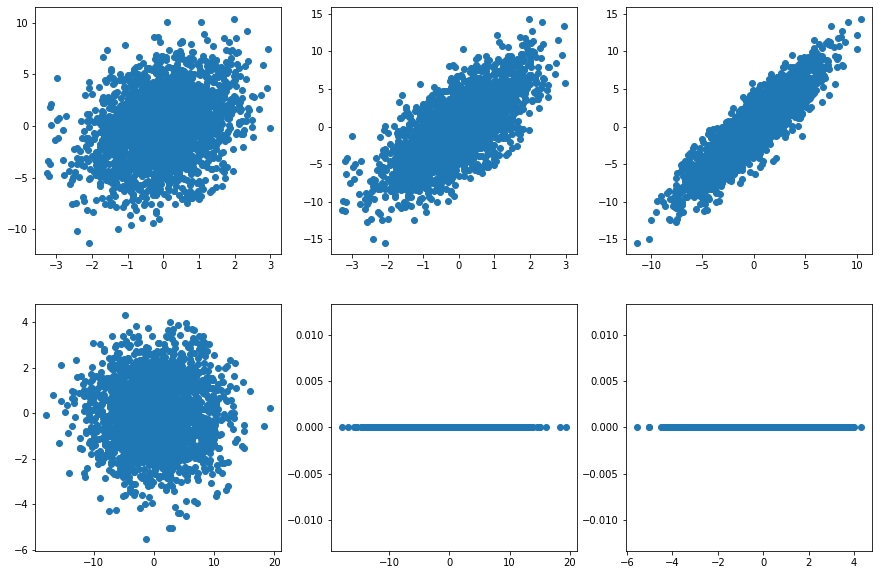

In [3]:
N = 2500
x1 = np.random.randn(N)
x2 = x1 + 3*np.random.randn(N)
x3 = 2*x1 + x2
X  = np.array([x1, x2, x3])


# PCA
lambdas, eigenV = np.linalg.eig(np.cov(X))
print("Eigenvalues:", lambdas)
print("Eigenvectors:\n", eigenV)

# SVD
U, sp, Vt = np.linalg.svd(X)
lambdas_svd = sp**2/(N-1)
eigenV_svd = U
print('\nSVD\n')
print("Eigenvalues:", eigenV_svd)
print("Eigenvectors:\n", lambdas_svd)

print("\n1st-2nd Principal components eplained variability ="
      , (lambdas_svd[0]+lambdas_svd[1])/np.sum(lambdas_svd))

# rotate data
Xr = np.dot(eigenV_svd.T, X)

#plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax[0,0].scatter(X[0], X[1])
ax[0,1].scatter(X[0], X[2])
ax[0,2].scatter(X[1], X[2])
ax[1,0].scatter(Xr[0], Xr[1])
ax[1,1].scatter(Xr[0], Xr[2])
ax[1,2].scatter(Xr[1], Xr[2]);

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Eigenvalues: [2.69339837e+01 1.14010705e-03 2.00044269e+00]
Eigenvectors:
 [[-0.11460298 -0.81644017  0.56594312]
 [-0.57847865 -0.40829574 -0.70615652]
 [-0.80760671  0.40831365  0.4255013 ]]

SVD

Eigenvalues: [[-0.11460363  0.56594366 -0.8164397 ]
 [-0.578478   -0.70615676 -0.40829625]
 [-0.80760709  0.42550017  0.40831408]]
Eigenvectors:
 [2.69340281e+01 2.00045625e+00 1.14029981e-03]

1st-2nd Principal components eplained variability = 0.9999605918370591


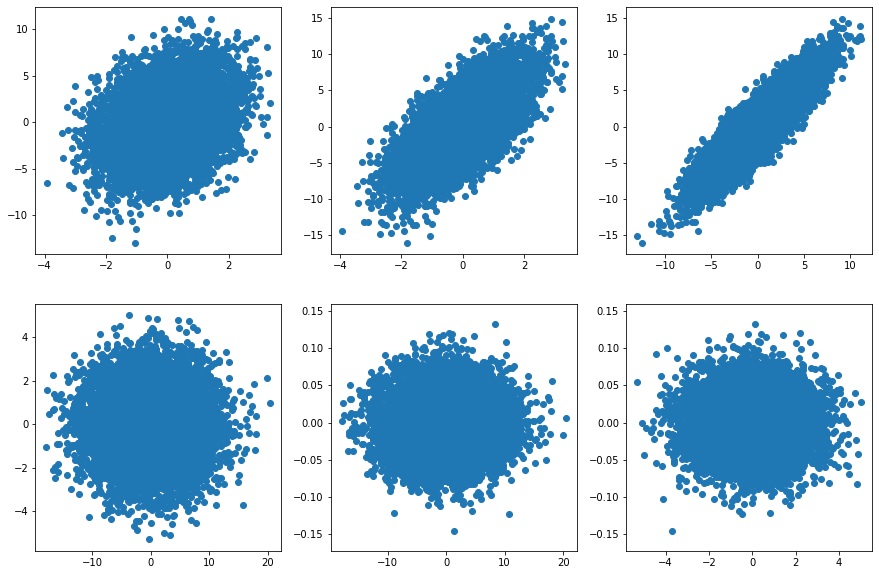

In [6]:
var_array = np.random.rand(10) / 50

N = 10000
x1 = np.random.randn(N)
x2 = x1 + 3*np.random.randn(N)
x3 = 2*x1 + x2

#add random noise
for s in var_array:
    x1 += np.random.randn(N)*s
    x2 += np.random.randn(N)*s
    x3 += np.random.randn(N)*s
X  = np.array([x1, x2, x3])


# PCA
lambdas, eigenV = np.linalg.eig(np.cov(X))
print("Eigenvalues:", lambdas)
print("Eigenvectors:\n", eigenV)

# SVD
U, sp, Vt = np.linalg.svd(X)
lambdas_svd = sp**2/(N-1)
eigenV_svd = U
print('\nSVD\n')
print("Eigenvalues:", eigenV_svd)
print("Eigenvectors:\n", lambdas_svd)

print("\n1st-2nd Principal components eplained variability ="
      , (lambdas_svd[0]+lambdas_svd[1])/np.sum(lambdas_svd))

# rotate data
Xr = np.dot(eigenV_svd.T, X)

#plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax[0,0].scatter(X[0], X[1])
ax[0,1].scatter(X[0], X[2])
ax[0,2].scatter(X[1], X[2])
ax[1,0].scatter(Xr[0], Xr[1])
ax[1,1].scatter(Xr[0], Xr[2])
ax[1,2].scatter(Xr[1], Xr[2]);